In [32]:
%matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [68]:
df = pd.read_csv('data/CongressionalRecordsData.csv')

In [69]:
df[0:2]

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?


In [70]:
df = df.replace({'?': np.nan}) # replace missing data (characterised by ?) with NaN so that it can be easily removed with the dropna method

In [71]:
df = df.dropna() # use dropna method to drop rows with NaN in them

In [72]:
df[0:2]

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y


In [73]:
df = df.replace({'y': 1, 'n': 0}) # replace y and n responses with numerical encodings

In [74]:
df[0:2]

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1


Now that we've cleaned up the data, removing missing values and encoded the features we can start to explore the data with some EDA.

In [75]:
df.shape

(232, 17)

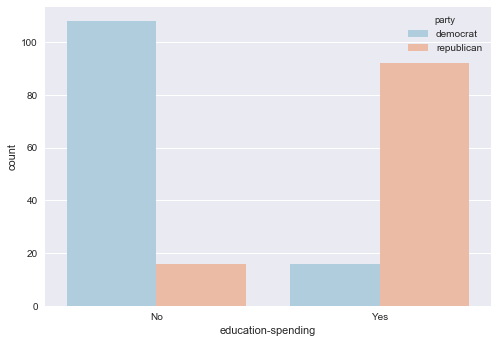

In [76]:
plt.figure()
sns.countplot(x='education-spending', hue='party', data=df, palette='RdBu_r')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

demoncrats voted against education spending and republicans voted for education spending.

## Using a KNN classifier to predict people's party based on what they voted on various issues

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier(n_neighbors=6)

In [80]:
X = df.drop(['party'], axis=1) # we isolate the features

In [84]:
y = df['party'] # we isolate the target variable

In [85]:
knn.fit(X, y) # we fit the KNN classifier to the training data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

We can then use the trained classifier to predict the target of the training data

In [125]:
y_pred_train = knn.predict(X)

In [130]:
sum(y_pred_train == y)/len(y)*100

93.103448275862064

If we do this we find it has a 93% accuracy of prediction on data it has already seen and been trained on. It works, but is not all that impressive, given that it trained on this data we would expect closer to 100%.

In [88]:
X_new = np.array([0.678477,  0.980385,  0.510029,  0.376991,  0.313839,  0.546415,  0.953941, 0.207359,  0.797287,  0.088688,  0.19835,  0.507787,  0.916102,  0.154499, 0.715147,  0.573135])

In [132]:
X_new_reshaped = X_new.reshape(-1, len(X_new))

# we reshape the data so that it can be entered into a pandas dataframe and show up as a column rather than a row

In [120]:
X_new_data = pd.DataFrame(X_new_reshaped) # we construct a dataframe with the new data in it to predict on

In [131]:
X_new_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.678477,0.980385,0.510029,0.376991,0.313839,0.546415,0.953941,0.207359,0.797287,0.088688,0.19835,0.507787,0.916102,0.154499,0.715147,0.573135


In [133]:
y_pred = knn.predict(X_new_data) 

# use the KNN model to predict the new datapoint's party

In [134]:
y_pred

array(['democrat'], dtype=object)

Data point is predicted as being a demoncrat.